labels [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]


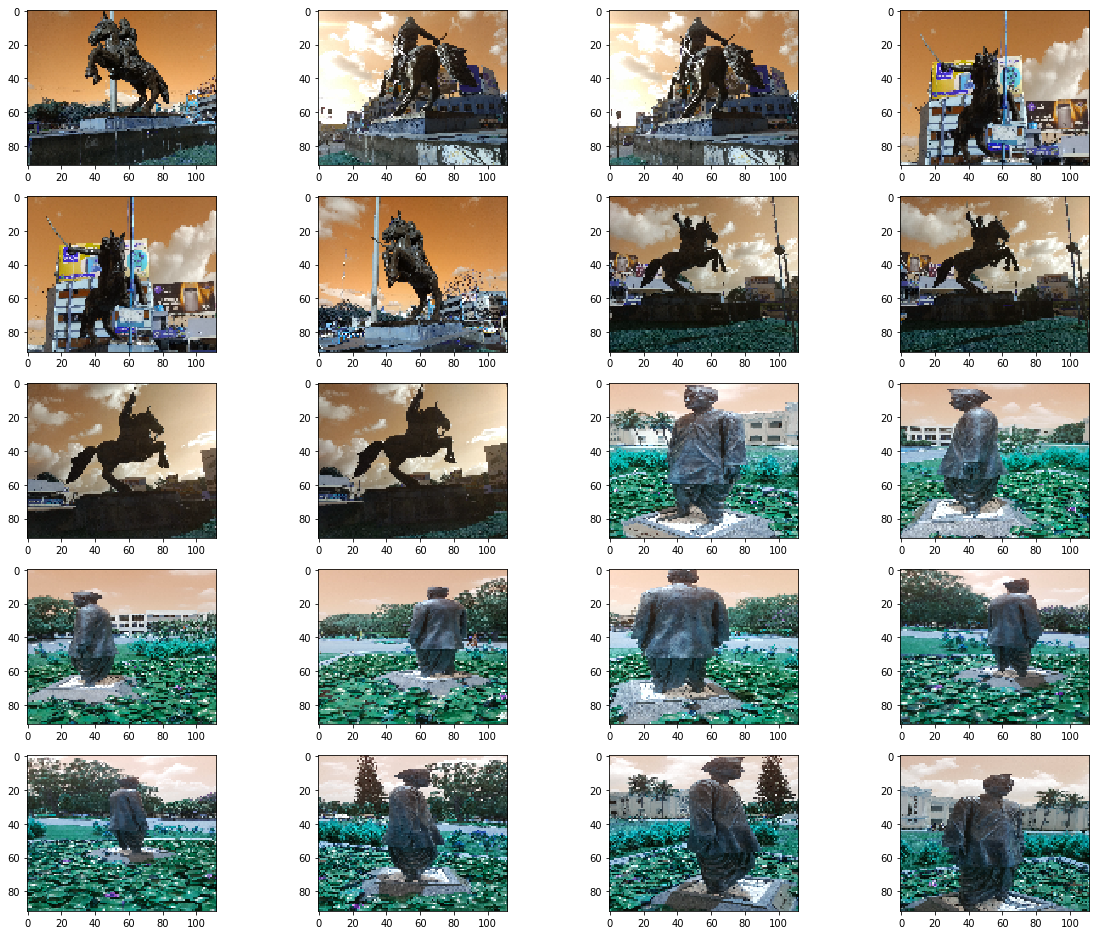

(20, 92, 112, 3)


In [2]:
#using 2 layers (16,64)
import glob
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np




# loading positive images and labels


images1=[]    # To store list of images

label=[]      # To Store Labels

files=glob.glob("C:/Users/VISH/Desktop/ml testing/train1/*.jpg")  # reads all the file_names from the specified folder into  files[] list 

for file in files:               #for loop for reading images into images1[] list and appends label of the image into label_positive[] list
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (112, 92))
    images1.append(resized_image)      
    label.append([1])

    
#plt.imshow(images1[1])       #displaying the first image of the list images1[]
#plt.show()



#-------------------------------------loading of positive images is done ----------------------------------------------------


#-------------------------------------loading  negative images and labels----------------------------------------------------

files=glob.glob("C:/Users/VISH/Desktop/ml testing/train2/*.jpg")  #reads all the file_names in the specified folder into  files[] list 

#print files     # prints all file names in the folder
#print len(files)   # prints number of files have been red

for file in files:               #for loop for reading images into images1[] list and appends label of the image into label_positive[] list
    image1=cv2.imread(file) 
    resized_image = cv2.resize(image1, (112, 92))
    images1.append(resized_image)      
    label.append([0])

    
#plt.imshow(images1[16])       #displaying the first image of the list images1[]
#plt.show()

print ("labels",label)


#-------------------------------------loading of Negative images is done ----------------------------------------------------


images2=np.array(images1)

plt.figure(figsize=(20,20))
columns = 4
for i in range(20):
    plt.subplot(20 / columns + 1, columns, i + 1)
    plt.imshow(images2[i,:,:,:])
plt.show()   




#images2=np.array(images1)
labels=np.array(label)
print (images2.shape)


* 4.25064 * 0
* 0.0851369 * 10
* 0.0582248 * 20
* 0.0463399 * 30
* 0.0390509 * 40
* 0.0339792 * 50
* 0.0301988 * 60
* 0.0272435 * 70
* 0.0248481 * 80
* 0.0228499 * 90
* 0.0211437 * 100
* 0.0196575 * 110
* 0.0183394 * 120
* 0.0171512 * 130
* 0.0160647 * 140
* 0.0150612 * 150
* 0.0141319 * 160
* 0.0132778 * 170
* 0.0125058 * 180
* 0.0118217 * 190
* 0.0112244 * 200
* 0.0107056 * 210
* 0.0102533 * 220
* 0.00985535 * 230
* 0.00950146 * 240
* 0.00918338 * 250
* 0.0088948 * 260
* 0.0086309 * 270
* 0.00838792 * 280
* 0.00816287 * 290
* 0.00795344 * 300
* 0.00775766 * 310
* 0.00757399 * 320
* 0.00740109 * 330
* 0.00723787 * 340
* 0.00708337 * 350
* 0.00693679 * 360
* 0.0067974 * 370
* 0.00666462 * 380
* 0.00653791 * 390
* 0.00641677 * 400
* 0.00630078 * 410
* 0.00618958 * 420
* 0.00608282 * 430
* 0.00598021 * 440
* 0.00588148 * 450
* 0.00578636 * 460
* 0.00569466 * 470
* 0.00560615 * 480
* 0.00552065 * 490
* 0.00543799 * 500
* 0.00535802 * 510
* 0.0052806 * 520
* 0.00520557 * 530
* 0.00513282 *

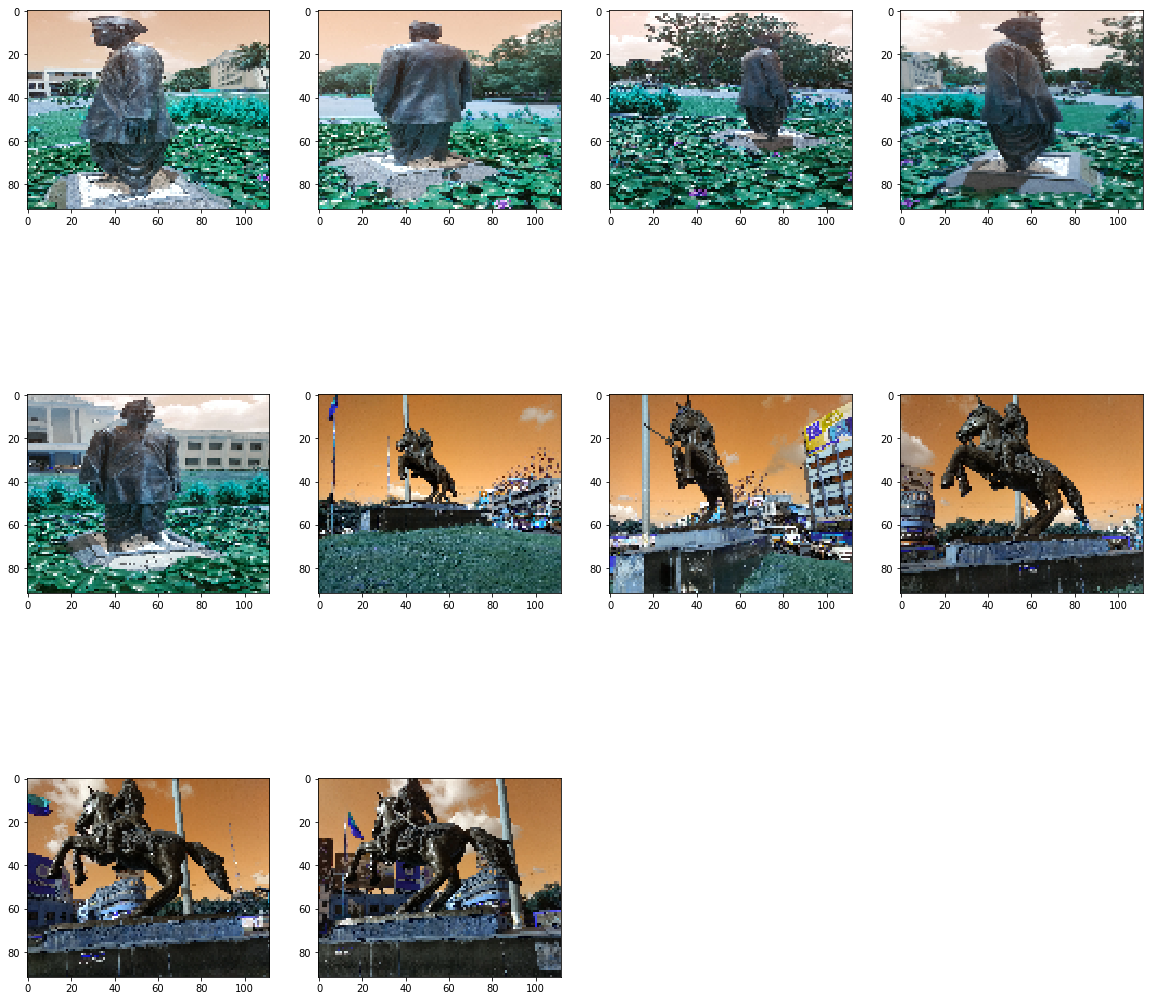

[[[ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 1.]]]


In [3]:
x = tf.placeholder(tf.float32,shape=(None,images2.shape[1],images2.shape[2],images2.shape[3]))   # Tenssorflow container to hold input data 
y = tf.placeholder(tf.float32, shape=[None,labels.shape[1]])         # Tensorflow container to hold  target data 


#------------------------------------------First Convolution Layer-----------------------------------------------------

W=tf.Variable(tf.random_normal([5, 5, 3, 64]))       # using 32 filters of 5x5 each having dimension 3    
b=tf.Variable(tf.random_normal([64]))                # 1x32 bais values  

x2 = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
x2 = tf.nn.bias_add(x2, b)
conv_output=tf.nn.relu(x2)
maxpool_output=tf.nn.max_pool(conv_output,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # New image 56x46 


#------------------------------------------Second Convolution Layer----------------------------------------------------

W1=tf.Variable(tf.random_normal([3, 3, 64, 16]))  # using 64 filters of 3x3 each having dimension of 32  
b1=tf.Variable(tf.random_normal([16]))            # 64 bais values

x3 = tf.nn.conv2d(maxpool_output, W1, strides=[1, 1, 1, 1], padding='SAME')
x3 = tf.nn.bias_add(x3, b1)
conv_output2=tf.nn.relu(x3)
maxpool_output2=tf.nn.max_pool(conv_output2,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


#-------------------------------------------Third Convolution Layer---------------------------------------------------

#W2=tf.Variable(tf.random_normal([3, 3, 64,16]))  # using 16 filters of 3x3 each having dimension of 16 
#b2=tf.Variable(tf.random_normal([16]))

#x4 = tf.nn.conv2d(maxpool_output, W2, strides=[1, 1, 1, 1], padding='SAME')
#x4 = tf.nn.bias_add(x4, b2)
#conv_output3=tf.nn.relu(x4)
#maxpool_output3=tf.nn.max_pool(conv_output3,ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')




#-------------------------------------------Fully Connected Network---------------------------------------------------


#fc_weights1=tf.Variable(tf.truncated_normal([14*12*16, 1024],stddev=0.05))  #   14*12*16 input features 
fc_weights1=tf.Variable(tf.truncated_normal([28*23*16, 1024],stddev=0.05))
fc_bias1=tf.Variable(tf.random_normal([1024]))               # 1024 bias   

fc_weights2=tf.Variable(tf.random_normal([1024, 128]))      # Hidden Layer accept 1024 
fc_bias2=tf.Variable(tf.random_normal([128]))               #2048 bias

fc_weights3=tf.Variable(tf.random_normal([128, 1]))       
fc_bias3=tf.Variable(tf.random_normal([1]))

fc1 = tf.reshape(maxpool_output2, [-1, fc_weights1.get_shape().as_list()[0]])
fc1 = tf.add(tf.matmul(fc1, fc_weights1), fc_bias1)
fc1 = tf.nn.sigmoid(fc1)


fcl2 = tf.add(tf.matmul(fc1, fc_weights2), fc_bias2)
fcl2=tf.nn.sigmoid(fcl2)



# Output, class prediction
out = tf.add(tf.matmul(fcl2, fc_weights3), fc_bias3)
out1=tf.nn.sigmoid(out)

#out1=tf.nn.dropout(out1,0.75)

cost = tf.reduce_mean(( (labels * tf.log(out1)) + ((1 - labels) * tf.log(1.0 - out1)) ) * -1)
#cost=tf.reduce_mean(tf.squared_difference(out1,labels))
#cost=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.cast(labels,tf.float32),logits=out1))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)           



with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
   
    for i in range(1000):
        res,_=sess.run([cost,train_step],feed_dict={x:images2,y:labels})
        if i%10 == 0:
            print ("*",res,"*",i)
    print ("Validating training dataset")
    
    files=glob.glob("C:/Users/VISH/Desktop/ml testing/test/*.jpg")  #reads all the file_names in the specified folder into  files[] list 

    images3=[]
#print files     # prints all file names in the folder
#print len(files)   # prints number of files have been red

    for file in files:               #for loop for reading images into images1[] list and appends label of the image into label_positive[] list
        image1=cv2.imread(file) 
        resized_image = cv2.resize(image1, (112, 92))
        images3.append(resized_image)      

    images2=np.array(images3)

    plt.figure(figsize=(20,20))
    columns = 4
    for i in range(10):
        plt.subplot(10 / columns + 1, columns, i + 1)
        plt.imshow(images2[i,:,:,:])
    plt.show()     
    
    res=sess.run([out1],feed_dict={x:images2})
    print (np.round(res))
    conv1_output=sess.run([conv_output],feed_dict={x:images2})
    conv2_output=sess.run([conv_output2],feed_dict={x:images2})
    conv1_weights=sess.run([W])
    conv2_weights=sess.run([W1])
   